# Seja Bem Vindo a Analise de Series Temporais

Vou apresentar essa análise de forma distinta das outras, pois aqui teremos a oportunidade de observar as informações de uma perspectiva temporal. Diferentemente dos números absolutos, estaremos lidando com uma visão mais ampla dos dados, abordando a evolução dos números ao longo do tempo.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [41]:
# Carregando os dados
amostra_df = pd.read_csv("Tabelas/amostras_df.csv")
amostra_df

,Data da Coleta,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira
0,2012-01-02,NE,BA,FEIRA DE SANTANA,ETANOL,2.050,Litro,COSAN LUBRIFICANTES
1,2012-01-02,SE,RJ,ITAPERUNA,GASOLINA,2.849,Litro,RAIZEN
2,2012-01-02,S,PR,CAMPO MOURAO,GASOLINA,2.769,Litro,BRANCA
3,2012-01-02,N,PA,TUCURUI,DIESEL,2.310,Litro,IPIRANGA
4,2012-01-02,N,PA,SANTANA DO ARAGUAIA,DIESEL,2.300,Litro,RAIZEN
...,...,...,...,...,...,...,...,...
558430,2022-12-30,SE,SP,PIRACICABA,GASOLINA,4.890,Litro,BRANCA
558431,2022-12-30,S,SC,BLUMENAU,ETANOL,4.290,Litro,IPIRANGA
558432,2022-12-30,SE,SP,PIRACICABA,DIESEL,6.590,Litro,BRANCA
558433,2022-12-30,S,SC,BLUMENAU,DIESEL S10,6.280,Litro,BRANCA


In [43]:
# Convertendo os dados e colocando as datas no indice da tabela
amostra_df['Data da Coleta'] = pd.to_datetime(amostra_df['Data da Coleta'])
amostra_df = amostra_df.set_index("Data da Coleta")

In [44]:
# Criando coluna de ano, mes e dia
amostra_df['Ano'] = amostra_df.index.year
amostra_df['Mes'] = amostra_df.index.month
amostra_df['Dia'] = amostra_df.index.day

In [23]:
#Mostando resultado
amostra_df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira,Ano,Mes,Dia
Data da Coleta,,,,,,,,,,
2012-01-02,NE,BA,FEIRA DE SANTANA,ETANOL,2.050,Litro,COSAN LUBRIFICANTES,2012,1,2
2012-01-02,SE,RJ,ITAPERUNA,GASOLINA,2.849,Litro,RAIZEN,2012,1,2
2012-01-02,S,PR,CAMPO MOURAO,GASOLINA,2.769,Litro,BRANCA,2012,1,2
2012-01-02,N,PA,TUCURUI,DIESEL,2.310,Litro,IPIRANGA,2012,1,2
2012-01-02,N,PA,SANTANA DO ARAGUAIA,DIESEL,2.300,Litro,RAIZEN,2012,1,2


In [24]:
# Salvando nova tabela
amostra_df.to_csv("Tabelas/amostra_series_df.csv", encoding='utf-8')

In [45]:
# Analise dos dados temporais
analise_ano_mes_dia = amostra_df[['Ano', 'Mes', 'Dia']].describe().transpose()
analise_ano_mes_dia.to_csv("Tabelas/analise_ano_mes_dia.csv", encoding='utf-8')
analise_ano_mes_dia

,count,mean,std,min,25%,50%,75%,max
Ano,558435.0,2016.464523,3.215086,2012.0,2014.0,2016.0,2019.0,2022.0
Mes,558435.0,6.305968,3.438166,1.0,3.0,6.0,9.0,12.0
Dia,558435.0,15.692858,8.773982,1.0,8.0,16.0,23.0,31.0


# Analise por Ano

In [46]:
# analisando especificamente por ano
analise_ano = amostra_df.groupby('Ano')['Valor de Venda'].sum().apply(lambda x: '{:,.2f}'.format(x))
analise_ano.to_csv("Tabelas/analise_ano.csv", encoding='utf-8')
analise_ano

Ano
2012    155,145.53
2013    167,073.04
2014    155,688.11
2015    158,451.19
2016    155,499.48
2017    128,869.02
2018    178,631.07
2019    187,833.58
2020    131,042.76
2021    212,757.25
2022    278,298.75
Name: Valor de Venda, dtype: object

## 1. Média de Preço por Ano

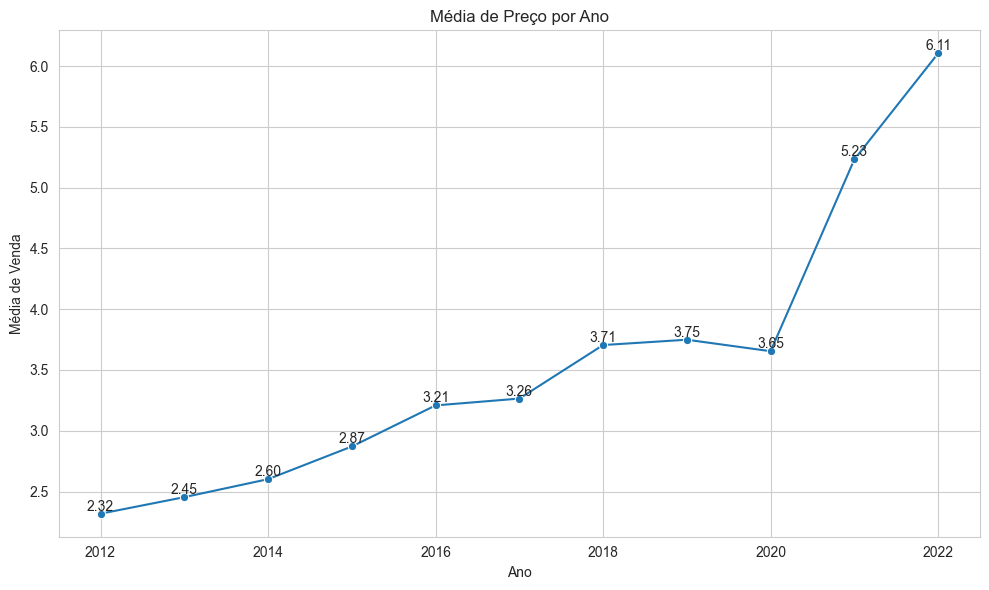

In [27]:
media_vendas_por_ano = amostra_df.groupby('Ano')['Valor de Venda'].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_ano = sns.lineplot(x=media_vendas_por_ano.index, y=media_vendas_por_ano.values, marker="o")

plt.title("Média de Preço por Ano")
plt.xlabel("Ano")
plt.ylabel("Média de Venda")

for ano, valor_medio in media_vendas_por_ano.items():
    plt.text(ano, valor_medio, f'{valor_medio:.2f}', ha='center', va='bottom', fontsize=10)

if not os.path.exists("Graficos_Seres_Temporais"):
    os.makedirs("Graficos_Seres_Temporais")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Media-de-Preço-por-Ano.png")

plt.show()

Vale ressaltar que durante o ano de 2020, possivelmente em decorrência da pandemia, houve um aumento significativo nos preços dos combustíveis. Esse cenário indicou um aumento considerável nos valores, possivelmente influenciado pelas circunstâncias desafiadoras que afetaram o mercado.

## 2. Preço de cada Protuto por Ano

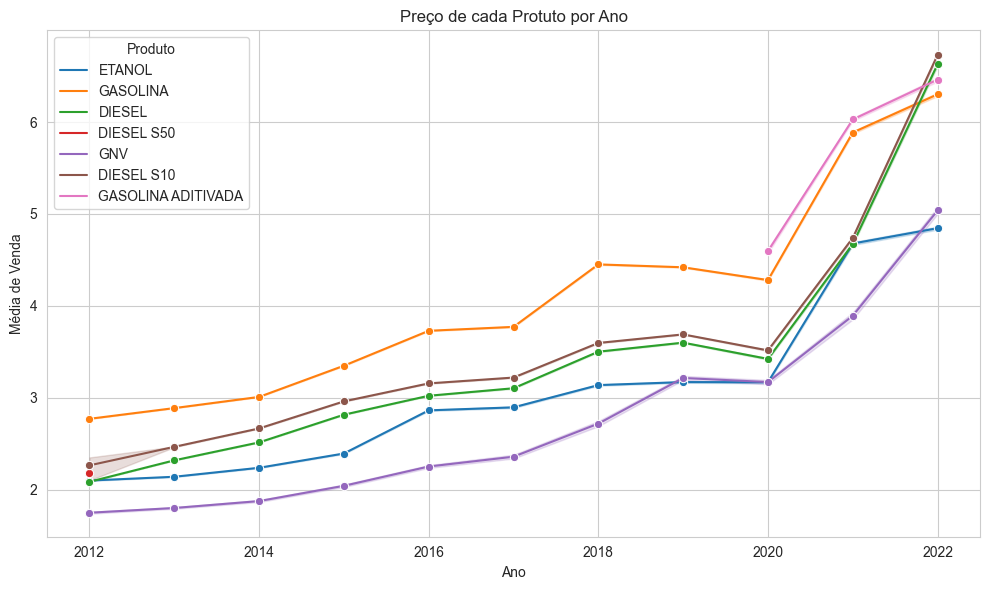

In [28]:
media_vendas_por_ano = amostra_df.groupby('Ano')['Valor de Venda'].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_ano = sns.lineplot(amostra_df, x="Ano", y="Valor de Venda", hue='Produto', marker="o")

plt.title("Preço de cada Protuto por Ano")
plt.xlabel("Ano")
plt.ylabel("Média de Venda")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Preço-de-cada-Protuto-por-Ano.png")

plt.show()

No segundo gráfico, fica evidente que a gasolina aditivada se destaca como um dos combustíveis mais caros. Isso pode explicar sua posição mais elevada neste gráfico, corroborada pelo fato de ser uma novidade no mercado, conforme indicado. Além disso, destaca-se que o GNV apresenta o preço mais baixo dentre todas as opções. Surpreendentemente, mesmo com essa posição vantajosa, o preço do GNV também aumentou durante a pandemia, sugerindo a influência global dos eventos desse período.

Uma análise adicional revela que o diesel e o diesel S10 foram os combustíveis mais impactados pela pandemia, apresentando aumento de preços significativo. Além disso, é notável a estreita relação de coeficiência entre esses dois combustíveis, indicando uma reação semelhante às mudanças de mercado.

Essas observações oferecem insights importantes sobre as flutuações de preços dos diferentes combustíveis, permitindo uma compreensão mais profunda das tendências e influências que moldaram o mercado.



## 3. Preço por região do brasil

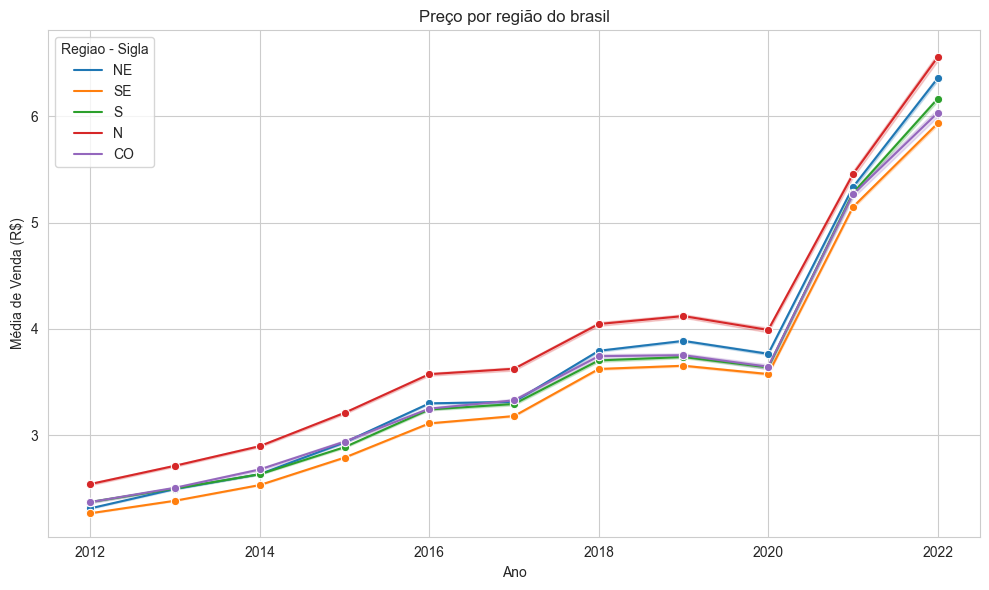

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_regiao = sns.lineplot(amostra_df, x="Ano", y="Valor de Venda", hue='Regiao - Sigla', marker="o")

plt.title("Preço por região do brasil")
plt.xlabel("Ano")
plt.ylabel("Média de Venda (R$)")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Preço-por-região-do-brasil.png")

plt.show()

No gráfico apresentado, fica visível a variação dos preços dos combustíveis nas diferentes regiões ao longo do período de 2012 a 2022. Destacam-se claramente as disparidades nos custos entre as regiões.

O Nordeste emerge como a região onde os preços dos combustíveis são notavelmente mais elevados. Em contrapartida, o Sudeste se diferencia como a região com preços mais acessíveis. Essa diferença reflete a complexa interação de diversos fatores econômicos, logísticos e regulatórios que podem influenciar os preços dos combustíveis em cada localidade.

É importante ressaltar que, ao analisar o panorama de 2022, somente o Sudeste manteve os preços abaixo da marca de R$ 6,00 reais. Essa distinção ressalta a tendência contínua da região em manter preços relativamente mais baixos em comparação com as demais.

Em resumo, a visualização do gráfico nos permite compreender de maneira clara e inequívoca as discrepâncias regionais nos preços dos combustíveis ao longo dos anos, contribuindo para uma análise mais aprofundada das influências econômicas e de mercado que moldam esses valores.

# Analise por Mes

In [47]:
# Analise especificamente por mes
analise_mes = amostra_df.groupby('Mes')['Valor de Venda'].sum().apply(lambda x: '{:,.2f}'.format(x))
analise_mes.to_csv("Tabelas/analise_mes.csv", encoding='utf-8')
analise_mes

Mes
1     168,145.09
2     153,951.31
3     174,180.51
4     172,382.20
5     161,808.72
6     163,056.59
7     179,188.37
8     165,972.14
9     130,771.86
10    139,956.33
11    144,230.10
12    155,646.55
Name: Valor de Venda, dtype: object

## 1. Média de Preço por Mês

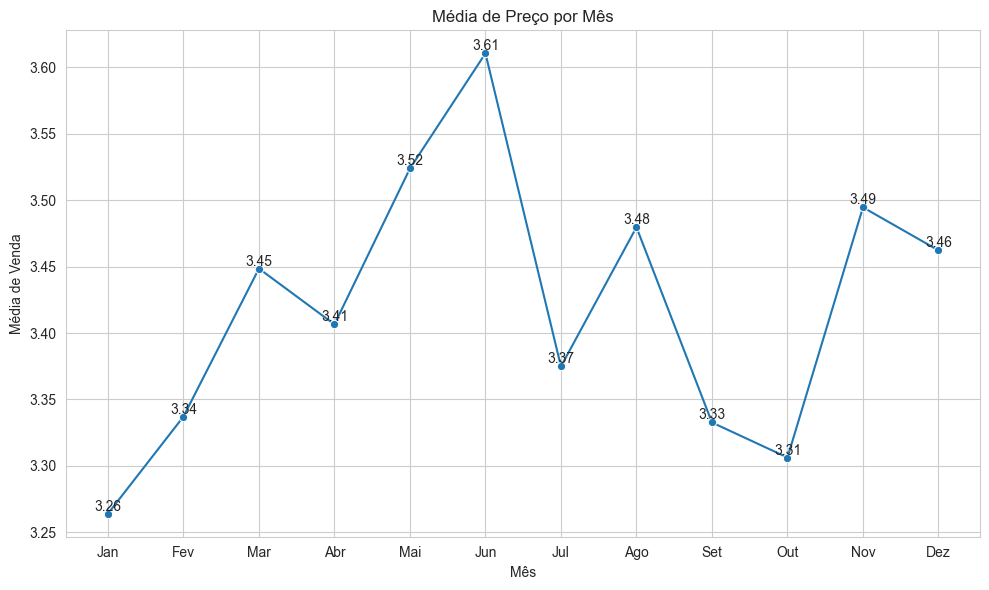

In [31]:
media_vendas_por_mes = amostra_df.groupby('Mes')['Valor de Venda'].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_mes = sns.lineplot(x=media_vendas_por_mes.index, y=media_vendas_por_mes.values, marker="o")

plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.title("Média de Preço por Mês")
plt.xlabel("Mês")
plt.ylabel("Média de Venda")

for mes, valor_medio in media_vendas_por_mes.items():
    plt.text(mes, valor_medio, f'{valor_medio:.2f}', ha='center', va='bottom', fontsize=10)

if not os.path.exists("Graficos_Seres_Temporais"):
    os.makedirs("Graficos_Seres_Temporais")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Media-de-Preço-por-Mes.png")

plt.show()

Nesta visualização, é possível observar a média dos valores dos preços dos combustíveis a cada mês do ano, proporcionando insights valiosos sobre padrões sazonais e flutuações nos preços.

É notável que o mês de janeiro se destaca como um período em que os combustíveis geralmente apresentam preços mais baixos em comparação com os outros meses do ano. Essa tendência pode ser atribuída a uma série de fatores. Janeiro frequentemente marca o término de períodos de alta demanda sazonal, como as festas de fim de ano, quando o consumo tende a ser mais intenso. Além disso, é possível que os preços sejam influenciados por políticas de mercado e regulamentações que variam no início do ano. Esses elementos combinados podem contribuir para preços relativamente mais baixos em janeiro.

Já no mês de junho, observa-se um aumento significativo nos preços dos combustíveis. Esse incremento pode ser atribuído a diferentes fatores. Junho é um mês caracterizado por férias escolares e viagens, o que pode levar a um aumento na demanda por combustíveis, elevando os preços devido à maior procura. Além disso, fatores externos como eventos internacionais, flutuações nos preços do petróleo e até mesmo fenômenos climáticos podem impactar os preços dos combustíveis nesse período.

Em resumo, a análise desses padrões sazonais e variações nos preços mensais nos ajuda a compreender melhor as dinâmicas complexas que afetam os valores dos combustíveis ao longo do ano, considerando influências tanto internas quanto externas.

## 2. Preço de cada Protuto por Mes

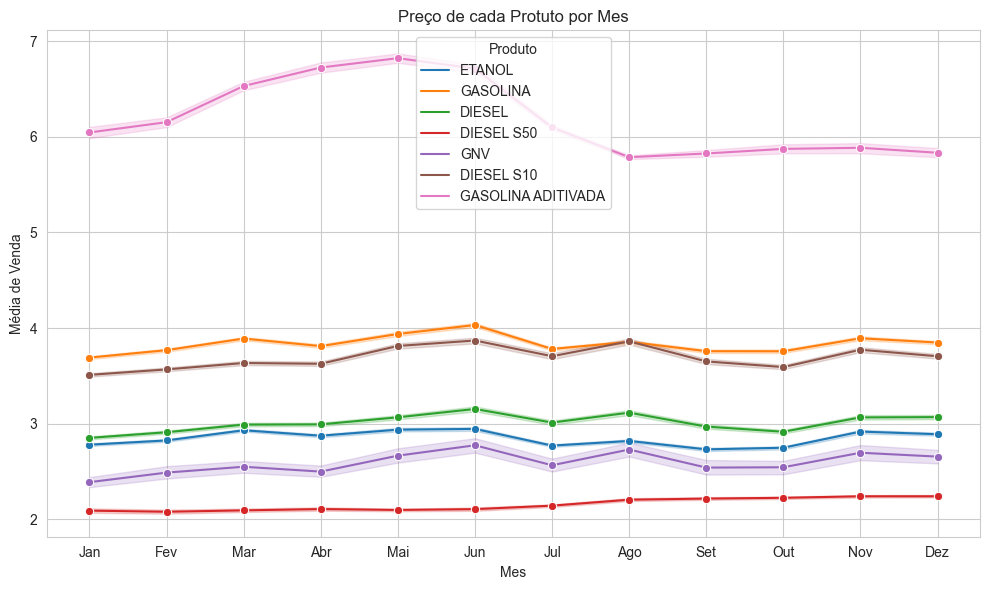

In [32]:
media_vendas_por_mes = amostra_df.groupby('Mes')['Valor de Venda'].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_mes = sns.lineplot(amostra_df, x="Mes", y="Valor de Venda", hue='Produto', marker="o")

plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.title("Preço de cada Protuto por Mes")
plt.xlabel("Mes")
plt.ylabel("Média de Venda")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Preço-de-cada-Protuto-por-Mes.png")

plt.show()

Embora essa seção seja mais focada na visualização dos dados, ainda é possível tirar algumas conclusões relevantes. Na análise dos preços mensais para cada tipo de combustível, salta à vista que a Gasolina aditivada se destaca como o combustível mais caro ao longo do período. Esse cenário provavelmente se deve a uma combinação de fatores.

A Gasolina aditivada, muitas vezes, é formulada com aditivos especiais que podem melhorar o desempenho do veículo e a eficiência do combustível. Esses aditivos podem resultar em um custo de produção mais elevado, refletindo-se diretamente no preço de venda para o consumidor. Além disso, questões relacionadas à demanda e à oferta, bem como flutuações nos custos de produção e distribuição, podem contribuir para a posição de destaque da Gasolina aditivada como o combustível mais caro nessa análise.

Embora esta seção se concentre principalmente na visualização dos dados, essas observações nos permitem considerar fatores subjacentes que podem influenciar as diferenças nos preços entre os tipos de combustível.

## 3. Preço de por cada Região por Mes

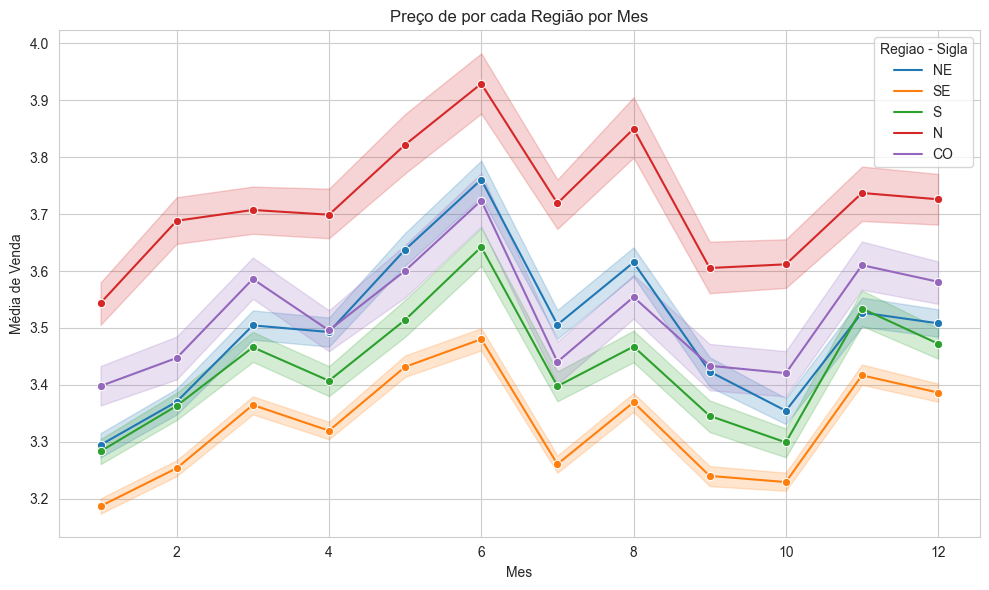

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_mes_regiao = sns.lineplot(amostra_df, x="Mes", y="Valor de Venda", hue='Regiao - Sigla', marker="o")

plt.title("Preço de por cada Região por Mes")
plt.xlabel("Mes")
plt.ylabel("Média de Venda")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Preço-de-por-cada-Região-por-Mes.png")

plt.show()

Ao explorar esses dados detalhadamente, podemos obter um panorama mais abrangente das complexas forças que influenciam os preços dos combustíveis em todo o país. Esse nível de análise pode fornecer informações valiosas para os setores de energia, economia e planejamento de políticas públicas, permitindo uma compreensão mais precisa das dinâmicas regionais e temporais dos preços dos combustíveis.

# Analise por Dia

In [34]:
analise_dia = amostra_df.groupby('Dia')['Valor de Venda'].sum().apply(lambda x: '{:,.2f}'.format(x))
analise_dia.to_csv("Tabelas/analise_dia.csv", encoding='utf-8')
analise_dia

Dia
1     55,572.75
2     65,301.41
3     64,249.46
4     64,560.86
5     65,429.50
6     64,811.95
7     58,440.05
8     63,322.58
9     58,832.05
10    66,970.20
11    65,680.59
12    61,007.20
13    67,201.67
14    60,160.00
15    63,425.44
16    62,771.19
17    65,636.25
18    66,255.29
19    56,402.88
20    63,885.80
21    58,353.07
22    66,589.74
23    65,565.05
24    58,989.75
25    60,016.33
26    60,607.41
27    66,226.02
28    60,526.67
29    60,622.97
30    60,972.90
31    30,902.76
Name: Valor de Venda, dtype: object

## 1. Analise dos preços por dia do Mes

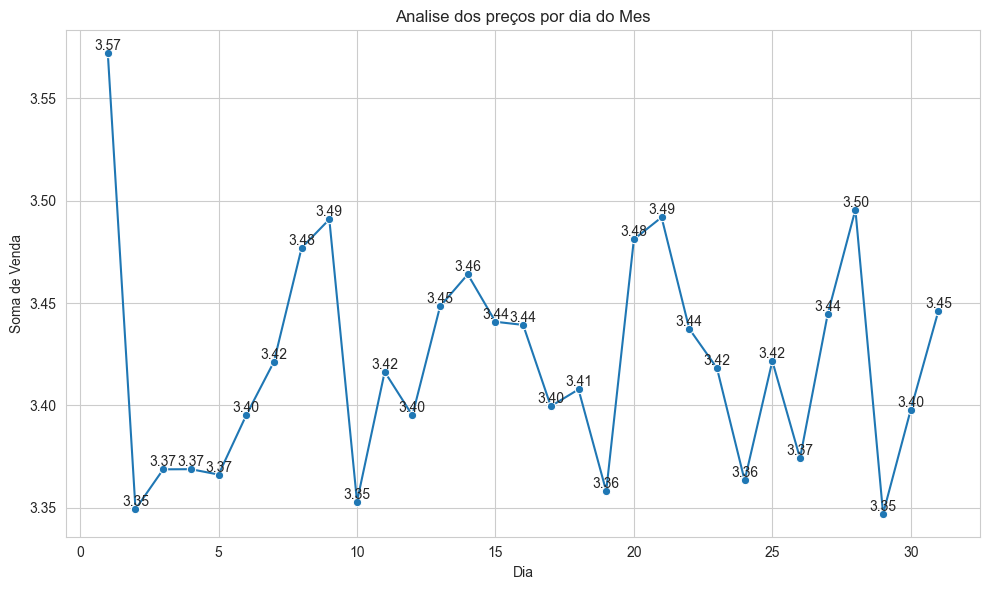

In [48]:
media_vendas_por_dia = amostra_df.groupby('Dia')['Valor de Venda'].mean()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
grafico_dia = sns.lineplot(x=media_vendas_por_dia.index, y=media_vendas_por_dia.values, marker="o")
plt.title("Analise dos preços por dia do Mes")
plt.xlabel("Dia")
plt.ylabel("Soma de Venda")

for dia, valor_soma in media_vendas_por_dia.items():
    plt.text(dia, valor_soma, f'{valor_soma:.2f}', ha='center', va='bottom', fontsize=10)

if not os.path.exists("Graficos_Seres_Temporais"):
    os.makedirs("Graficos_Seres_Temporais")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Soma-dos-Preço-por-Dia.png")

plt.show()

É notável que no primeiro dia de cada mês, a média dos valores apresenta uma tendência a ser mais alta. Esse comportamento pode ser atribuído a uma série de fatores. Muitos países e regiões reajustam os preços dos combustíveis no início de cada mês, o que pode resultar em valores iniciais mais elevados.

Ademais, diariamente, os preços dos combustíveis tendem a flutuar consideravelmente. No entanto, nossa análise revela que quatro dias específicos no mês se destacam por terem preços notavelmente mais baixos: o segundo, décimo, décimo nono, vigésimo quarto e vigésimo nono dias. Esses dias podem estar associados a padrões de oferta e demanda, variações nos preços internacionais do petróleo e outros fatores que resultam em quedas temporárias nos preços.

Ao interpretar essas tendências diárias, podemos captar uma visão mais detalhada da dinâmica dos preços dos combustíveis e das flutuações que ocorrem em diferentes momentos do mês. Essas observações fornecem insights valiosos para consumidores, investidores e analistas que buscam entender as complexidades dos mercados de energia.

## 2. Preço de cada Produto por Dia

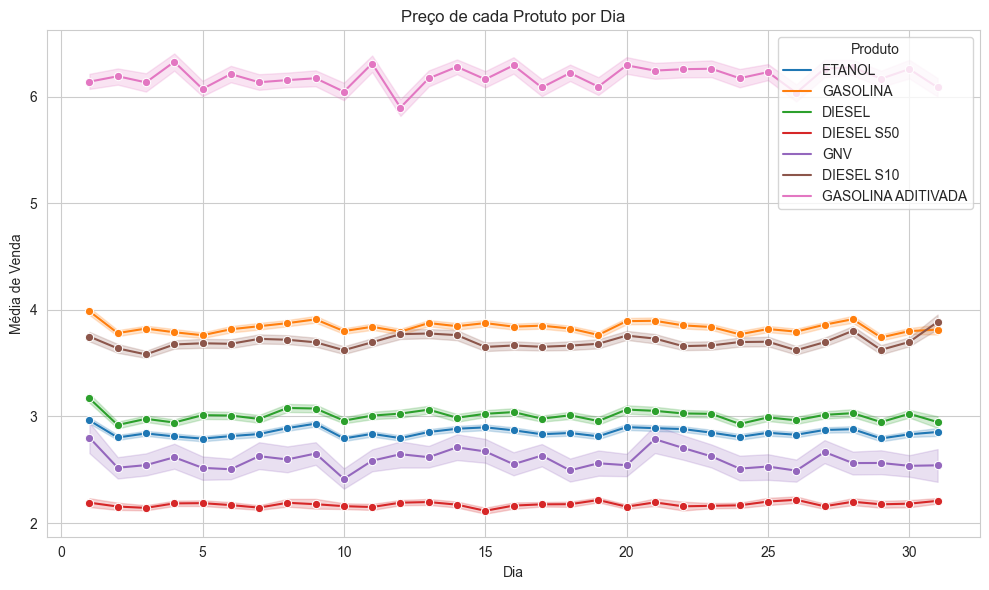

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_mes = sns.lineplot(amostra_df, x="Dia", y="Valor de Venda", hue='Produto', marker="o")

plt.title("Preço de cada Produto por Dia")
plt.xlabel("Dia")
plt.ylabel("Média de Venda")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Preço-de-cada-Produto-por-Dia.png")

plt.show()

Nesta seção, realizamos uma análise mais detalhada dos produtos, agora em uma frequência diária. A observação dos produtos diariamente permite capturar nuances mais sutis nos preços e destacar a predominância de determinados combustíveis.

Novamente, a Gasolina aditivada se destaca de forma absoluta como o produto com o preço mais elevado. Esse padrão reforça a ideia de que a Gasolina aditivada, possivelmente devido aos seus atributos e componentes especiais, mantém uma posição de destaque entre os combustíveis mais caros.

Além disso, ao observar os preços diários de cada combustível, nota-se que a maioria deles tende a se manter relativamente estável ao longo do tempo. Essa estabilidade reflete a influência de diversos fatores, incluindo regulamentações, demanda e oferta no mercado local e internacional.

É interessante mencionar que o GNV (Gás Natural Veicular) exibe uma variação um pouco mais acentuada em comparação com os outros combustíveis. Embora essa variação seja mais pronunciada, ainda assim não é excessivamente acentuada, sugerindo uma relativa estabilidade nesse segmento.

Ao analisar esses dados em uma escala diária, conseguimos uma compreensão mais profunda das flutuações de preços de cada combustível, contribuindo para uma visão mais completa do cenário de preços no mercado.

## 3. Preço de cada Região por Dia

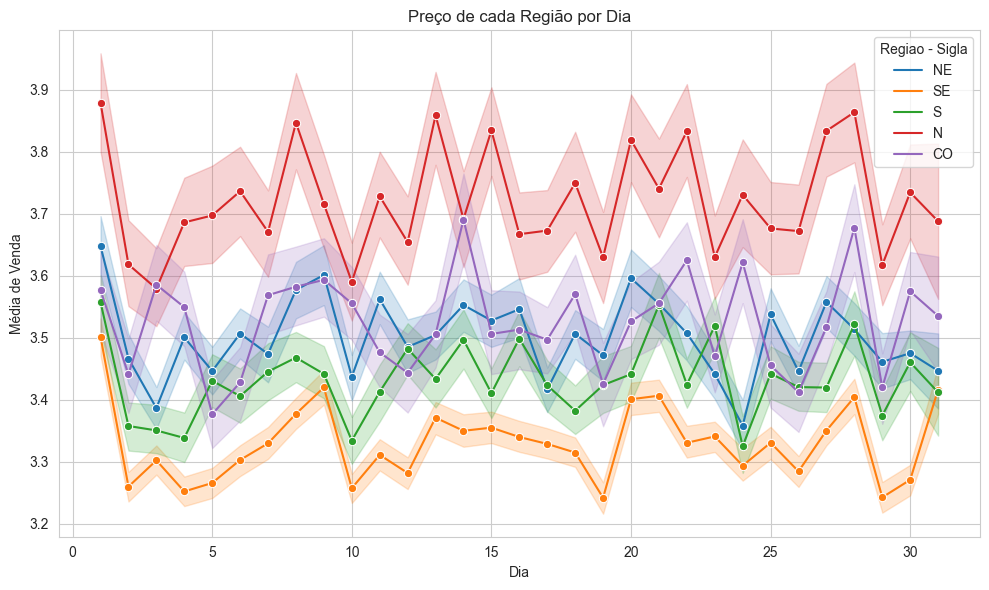

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

grafico_dia_regiao = sns.lineplot(amostra_df, x="Dia", y="Valor de Venda", hue='Regiao - Sigla', marker="o")

plt.title("Preço de cada Região por Dia")
plt.xlabel("Dia")
plt.ylabel("Média de Venda")

plt.tight_layout()
plt.savefig("Graficos_Seres_Temporais/Preço-de-cada-Região-por-Dia.png")

plt.show()

Neste contexto, a análise das variações diárias dos preços por região revela um cenário complexo e volátil. As flutuações diárias nos preços dos combustíveis, que podem parecer caóticas à primeira vista, corroboram os insights anteriores obtidos por meio das análises regionais.

continua em 4_machine_learning.ipynb...